![PyData_logo](./static/pydata-logo-madrid-2016.png)

# Remove Before Flight
## Analyzing Flight Safety Data with Python

###### Jesús Martos Carrizo
###### Alejandro Sáez Mollejo

### Introduction

#### Some figures 

![passengers](./static/passenger.jpg)
###### by Ryan McGuire

####  Flight Safety

#### Obejctive of this talk 

##### Disclaimer

#### Some remarks about

![pandas-logo](./static/pandas_logo.png)

#### Data source

<img src="./static/ntsb.jpg" style="width: 150px;"/>

__National Transportation Safety Board__ is charged with determining the probable cause of transportation accidents and promoting transportation safety, and assisting victims of transportation accidents and their families.

Data: http://www.ntsb.gov/_layouts/ntsb.aviation/index.aspx

### Loading & Cleaning data 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Some configuration options:
pd.set_option('max_columns', 70)
pd.set_option('max_rows', 50)

# to show all posiible options:
# pd.describe_option()

# to reset to default option value:
# pd.reset_option('max_columns')

# to show current value:
# pd.get_option('max_columns')

In [153]:
events = pd.read_csv("./data/events.csv",
                                    sep='|', # Use eventid as index was generating problems
                                    index_col=0)  # Use eventid as index
occurrences = pd.read_csv("./data/Occurrences1.csv",
                                    sep=';',
                                    index_col=0)  # Use eventid as index

C:\Users\jesus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
# 31 events with NaN date
print(events['ev_date'].isnull().sum())

# 345 events with NaN time
print(events['ev_time'].isnull().sum())

31
345


##### A first glipse of the data 

In [43]:
events.head(5)
# there is an extra row for ev_id with no data because we have used index_col=0 as an argument in the function read_csv()

,ev_id,ntsb_no,ev_type,ev_date,ev_dow,ev_time,ev_tmzn,ev_city,ev_state,ev_country,ev_site_zipcode,ev_year,ev_month,mid_air,on_ground_collision,latitude,longitude,latlong_acq,apt_name,ev_nr_apt_id,ev_nr_apt_loc,apt_dist,apt_dir,apt_elev,wx_brief_comp,wx_src_iic,wx_obs_time,wx_obs_dir,wx_obs_fac_id,wx_obs_elev,wx_obs_dist,wx_obs_tmzn,light_cond,sky_cond_nonceil,sky_nonceil_ht,...,sky_cond_ceil,vis_rvr,vis_rvv,vis_sm,wx_temp,wx_dew_pt,wind_dir_deg,wind_dir_ind,wind_vel_kts,wind_vel_ind,gust_ind,gust_kts,altimeter,wx_dens_alt,wx_int_precip,metar,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,invest_agy,ntsb_docket,ntsb_notf_from,ntsb_notf_date,ntsb_notf_tm,fiche_number,lchg_date,lchg_userid,wx_cond_basic,faa_dist_office
0,20001208X07734,LAX97FA143,ACC,04/02/1997 12:00:00 AM,WE,2016,MST,GRAND CANYON,AZ,USA,86023,1997,4,N,N,,,NaN,,,OFAP,NaN,NaN,NaN,PARP,WFAC,1954,180,GCN,6606,21,MST,NDRK,SCAT,3600,...,BKN,"0,00000000e+00",0,"1,00000000e+01",-2,-3,0,U,0,CALM,N,0,"2,90000000e+01",NaN,UNK,NaN,FATL,0,0,0,2,NaN,NaN,NaN,2,N,1890,NaN,04/02/1997 12:00:00 AM,1922,IMAGE,12/08/2000 12:13:19 PM,dbo,IMC,NaN
1,20021008X05297,CHI02LA299,ACC,09/29/2002 12:00:00 AM,Su,2100,CDT,Moorhead,MN,USA,56560,2002,9,N,N,465021N,0963947W,NaN,Moorhead Municipal,JKJ,ONAP,NaN,NaN,917,UNK,WFAC,2053,47,FAR,908,9,BST,NDRK,CLER,NaN,...,OVC,NaN,NaN,"7,00000000e+00",14,12,160,Y,13,SPEC,Y,0,"2,97099991e+01",NaN,NaN,NaN,SERS,NaN,NaN,NaN,NaN,1,NaN,1,2,N,13246,FAA,10/03/2002 12:00:00 AM,945,DMS,04/23/2003 12:26:44 PM,NTSB\\MONR,VMC,Minneapolis FSDO
2,20040127X00111,LAX04LA103,ACC,10/12/2003 12:00:00 AM,Su,1640,MST,Scottsdale,AZ,USA,85255,2003,10,N,N,333722N,1115438W,NaN,Scottsdale,SDL,ONAP,NaN,NaN,1510,FULL,WFAC,1653,NaN,KSDL,1510,NaN,MST,DAYL,CLER,NaN,...,NONE,NaN,NaN,"1,00000000e+01",33,12,NaN,NaN,NaN,CALM,N,NaN,"2,98899994e+01",NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,N,17586,FAA,01/22/2004 12:00:00 AM,1215,DMS,04/28/2005 02:59:26 PM,NTSB\\JOHB,VMC,WP-SDL-FSDO
3,20001213X34369,ANC86LA135,ACC,08/23/1986 12:00:00 AM,SA,1100,AKD,TALKEETNA,AK,USA,99676,1986,8,N,N,,,NaN,,,OFAP,"0,00000000e+00",0,0,UNK,PILO,0,0,,0,0,,DAYL,CLER,0,...,NONE,"0,00000000e+00",0,"5,00000000e+01",10,-18,0,U,0,UNK,U,0,NaN,NaN,UNK,NaN,NONE,0,0,0,NaN,NaN,3,NaN,NaN,N,891,NaN,08/23/1986 12:00:00 AM,1430,31238,01/02/2001 09:14:50 AM,dbo,VMC,NaN
4,20001213X35290,ANC87LA019,ACC,12/07/1986 12:00:00 AM,SU,1256,AST,SHAGELUK,AK,USA,99665,1986,12,N,N,,,NaN,,1,OFAP,"0,00000000e+00",0,0,UNK,PILO,0,0,,0,0,,DAYL,SCAT,1500,...,NONE,"0,00000000e+00",0,"4,00000000e+01",-1,-1,0,U,0,CALM,N,0,"2,90000000e+01",NaN,LGT,NaN,NONE,0,0,0,NaN,NaN,1,NaN,NaN,N,1400,NaN,12/07/1986 12:00:00 AM,1300,31791,01/02/2001 09:14:55 AM,dbo,VMC,NaN


In [44]:
events.columns

Index(['ev_id', 'ntsb_no', 'ev_type', 'ev_date', 'ev_dow', 'ev_time',
       'ev_tmzn', 'ev_city', 'ev_state', 'ev_country', 'ev_site_zipcode',
       'ev_year', 'ev_month', 'mid_air', 'on_ground_collision', 'latitude',
       'longitude', 'latlong_acq', 'apt_name', 'ev_nr_apt_id', 'ev_nr_apt_loc',
       'apt_dist', 'apt_dir', 'apt_elev', 'wx_brief_comp', 'wx_src_iic',
       'wx_obs_time', 'wx_obs_dir', 'wx_obs_fac_id', 'wx_obs_elev',
       'wx_obs_dist', 'wx_obs_tmzn', 'light_cond', 'sky_cond_nonceil',
       'sky_nonceil_ht', 'sky_ceil_ht', 'sky_cond_ceil', 'vis_rvr', 'vis_rvv',
       'vis_sm', 'wx_temp', 'wx_dew_pt', 'wind_dir_deg', 'wind_dir_ind',
       'wind_vel_kts', 'wind_vel_ind', 'gust_ind', 'gust_kts', 'altimeter',
       'wx_dens_alt', 'wx_int_precip', 'metar', 'ev_highest_injury',
       'inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd', 'inj_tot_f', 'inj_tot_m',
       'inj_tot_n', 'inj_tot_s', 'inj_tot_t', 'invest_agy', 'ntsb_docket',
       'ntsb_notf_from', 'ntsb_notf_date'

In [45]:
# Why should we change the column names?
# Moreover, names with capitals and spaces make it more complicated for us
# to select the column (ie. `events.ev_dow` is valid and `events.Event day of the week` is not)

#events = events.rename(columns = {'ev_dow':'Event day of the week','light_cond':'Light Conditions','wind_vel_kts':'Wind Speed(knots)',
#                       'metar':'METAR Weather Report','vis_rvr':'Visibility Runway Visual Range (Feet)',
#                        'vis_rvv':'Visibility Runway Visual Value (Statute Miles)','vis_sm':'Visibility (Statute Miles)',
#                        'wx_cond_basic':'Basic Weather Conditions'})

In [46]:
events.dtypes

ev_id              object
ntsb_no            object
                    ...  
wx_cond_basic      object
faa_dist_office    object
dtype: object

In [47]:
# Not really useful for the majority of columns
events.describe()

,ev_time,ev_year,apt_dir,apt_elev,wx_obs_time,wx_obs_dir,wx_obs_elev,wx_obs_dist,sky_nonceil_ht,sky_ceil_ht,vis_rvv,wx_temp,wx_dew_pt,wind_dir_deg,wind_vel_kts,gust_kts,wx_dens_alt,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,ntsb_docket,ntsb_notf_tm
count,76535.000000,76848.000000,37020.000000,48146.000000,69909.000000,63990.000000,67552.000000,65299.000000,56454.000000,55382.000000,48754.000000,67043.000000,55773.00000,67986.000000,69080.000000,53729.000000,20314.000000,49522.000000,49526.000000,49513.000000,15253.000000,14347.000000,46273.000000,10793.000000,35217.000000,72695.000000,56995.000000
mean,1373.671196,1996.920427,49.827769,1055.010344,999.464661,103.528911,866.237728,11.339745,3255.918819,2930.506861,0.146039,19.850603,6.87797,161.884167,7.257426,3.650245,1772.910357,0.010157,0.013064,0.011209,2.813545,1.866732,7.574676,1.543037,2.451969,8586.409781,1043.181577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,1700.000000,2005.000000,20.000000,1071.000000,1553.000000,200.000000,845.000000,16.000000,4000.000000,2700.000000,0.000000,27.000000,16.00000,260.000000,10.000000,0.000000,2370.750000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,16468.500000,1600.000000
max,2400.000000,26733.000000,979.000000,13250.000000,2400.000000,360.000000,751635.000000,1526.000000,250000.000000,250000.000000,4444.000000,1652.000000,1646.00000,999.000000,210.000000,999.000000,26858.000000,44.000000,62.000000,71.000000,349.000000,380.000000,699.000000,111.000000,380.000000,34935.000000,2400.000000


In [48]:
# Lets gather some info about the data
events.info(max_cols=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76880 entries, 0 to 76879
Columns: 71 entries, ev_id to faa_dist_office
dtypes: float64(27), object(44)
memory usage: 42.2+ MB


In [49]:
# What does 41.6+ MB mean???
events.info(max_cols=0, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76880 entries, 0 to 76879
Columns: 71 entries, ev_id to faa_dist_office
dtypes: float64(27), object(44)
memory usage: 208.3 MB


In [50]:
events.memory_usage(deep=True).sum() / 1048  # KiB  

207867.63358778626

In [51]:
# with deep=False same as events.values.nbyte; what is the difference when is True?
events.values.nbytes / 1048

41667.78625954199

In [52]:
events.info(max_cols=0, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76880 entries, 0 to 76879
Columns: 71 entries, ev_id to faa_dist_office
dtypes: float64(27), object(44)
memory usage: 208.3 MB


##### Selecting only certain events 

##### Accidents 

In [21]:
# Maybe there is a better way to select...
# Make a brief comparison of results and performance (%timeit)
events = events[events['ev_type'] == 'ACC']
# options:
# events = events.where(events['ev_dow']=='WE')       # the return a DataFrame of the same shape as the original.When the logical 
                                                    # condition in False the result is the whole row filled with NaNs.
                                                    # By default, where returns a modified copy of the data. There is an 
                                                    # optional parameter inplace so that the original data can be modified
                                                    # without creating a copy

# events = events.where(events['ev_dow']=='WE', 0, inplace=True)     # same that above but choosing the result instead of NaN and 
                                                                 # without creating a copy

# events = events.mask(events['ev_dow']=='WE')      # mask is the inverse boolean operation of where

# events = events.query('ev_type == ACC')     #  query() method that allows selection using an expression. In pandas 0.18 is 
                                              # an experimental method. Can this become useful?

##### Kind of flight 

In [22]:
most_victims = events['inj_tot_t'].sort_values(ascending=False).iloc[0:150]
most_victims.head(10)

11753    349
64434    295
        ... 
45452    231
41787    230
Name: inj_tot_t, dtype: float64

In [23]:
most_victims.count()

150

In [24]:
aircraft = pd.read_csv("./data/aircraft.csv",
                                    encoding = "ISO-8859-1",  # export the table again.
                                    sep=';')

# check DtypteWarning 
# Columns (4,7,17,27,28,32,37,38,47,48,53,63,70,72,73,76,82) have mixed types.
# Specify dtype option on import or set low_memory=False.

C:\Users\jesus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (4,7,17,27,28,32,37,38,47,48,53,63,70,72,73,76,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
aircrafts_most_victims = aircraft[aircraft['ev_id'].isin(most_victims.index)]
aircrafts_most_victims

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,acft_expl,acft_make,acft_model,acft_series,acft_serial_no,cert_max_gr_wt,acft_category,acft_reg_cls,homebuilt,fc_seats,cc_seats,pax_seats,total_seats,num_eng,fixed_retractable,type_last_insp,date_last_insp,afm_hrs_last_insp,afm_hrs,elt_install,elt_oper,elt_aided_loc_ev,elt_type,owner_acft,owner_street,...,second_pilot,dprt_pt_same_ev,dprt_apt_id,dprt_city,dprt_state,dprt_country,dprt_time,dprt_timezn,dest_same_local,dest_apt_id,dest_city,dest_state,dest_country,phase_flt_spec,report_to_icao,evacuation,lchg_date,lchg_userid,afm_hrs_since,rwy_num,rwy_len,rwy_width,site_seeing,air_medical,med_type_flight,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other


In [26]:
# Number of accidents in each far part
aircrafts_most_victims['far_part'].value_counts()

Series([], Name: far_part, dtype: int64)

In [27]:
# Aircraft make
aircrafts_most_victims['acft_make'].value_counts() 

Series([], Name: acft_make, dtype: int64)

In [28]:
# Some of them are in caps
aircrafts_most_victims['acft_make'] = aircrafts_most_victims['acft_make'].str.lower()
aircrafts_most_victims['acft_make'].value_counts() 

Series([], Name: acft_make, dtype: int64)

In [29]:
# Far part
# Check again!
desired_far_parts = ['NUSC',  # Non-U.S. Commercial
                     '121',      # Air Carrier
                     '129',      # Foreign
                   # '091',      # General Aviation
                     'NUSN',  # Non-U.S. Non-Commercial
                     'UNK',     # Unknown
                     '135']      # Air Taxi & Commuter

In [30]:
cond = aircraft['far_part'].isin(desired_far_parts)
ev_ids_for_desired_far = aircraft[cond]['ev_id'].drop_duplicates()

ev_ids_for_desired_far.count()

ev_ids_for_desired_far.values

array(['20001204X00000', '20001204X00001', '20001204X00002', ...,
       '20160210X70158', '20160212X11826', '20160222X93713'], dtype=object)

In [31]:
# Using ev_id as index is behaving different here
#events = events.loc[ev_ids_for_desired_far.values]
#events['ev_type'].count()

In [33]:
pd.options.display.max_rows = 5
events = events[events['ev_id'].isin(ev_ids_for_desired_far.values)]
events

,ev_id,ntsb_no,ev_type,ev_date,ev_dow,ev_time,ev_tmzn,ev_city,ev_state,ev_country,ev_site_zipcode,ev_year,ev_month,mid_air,on_ground_collision,latitude,longitude,latlong_acq,apt_name,ev_nr_apt_id,ev_nr_apt_loc,apt_dist,apt_dir,apt_elev,wx_brief_comp,wx_src_iic,wx_obs_time,wx_obs_dir,wx_obs_fac_id,wx_obs_elev,wx_obs_dist,wx_obs_tmzn,light_cond,sky_cond_nonceil,sky_nonceil_ht,...,sky_cond_ceil,vis_rvr,vis_rvv,vis_sm,wx_temp,wx_dew_pt,wind_dir_deg,wind_dir_ind,wind_vel_kts,wind_vel_ind,gust_ind,gust_kts,altimeter,wx_dens_alt,wx_int_precip,metar,ev_highest_injury,inj_f_grnd,inj_m_grnd,inj_s_grnd,inj_tot_f,inj_tot_m,inj_tot_n,inj_tot_s,inj_tot_t,invest_agy,ntsb_docket,ntsb_notf_from,ntsb_notf_date,ntsb_notf_tm,fiche_number,lchg_date,lchg_userid,wx_cond_basic,faa_dist_office
40,20140507X51410,DCA14CA090,ACC,03/04/2014 12:00:00 AM,Tu,2300,PST,San Diego,CA,USA,92101,2014,3,N,N,324406N,1171123W,NaN,San Diego International,SAN,ONAP,"0,00000000e+00",NaN,17,NaN,UNK,651,NaN,SAN,NaN,NaN,UTC,DAYL,FEW,NaN,...,NONE,NaN,NaN,"1,00000000e+01",15,11,20,Y,3,SPEC,N,NaN,"3,00799999e+01",NaN,NaN,NaN,SERS,NaN,NaN,NaN,NaN,NaN,186,1,1,N,NaN,Delta Air Lines Flight Safety,NaN,NaN,NaN,09/10/2015 04:49:58 PM,lovj,VMC,NaN
46,20001213X30836,ANC87FA067,ACC,05/07/1987 12:00:00 AM,TH,1415,AKD,NIGHTMUTE,AK,USA,99690,1987,5,N,N,,,NaN,,,OFAP,"0,00000000e+00",0,NaN,UNK,WIT,0,0,,0,0,,DAYL,CLER,0,...,OBSC,"0,00000000e+00",0,"1,00000000e+00",-1,-2,140,U,6,UNK,N,0,"2,90000000e+01",NaN,LGT,NaN,FATL,0,0,0,1,NaN,NaN,NaN,1,N,217,NaN,05/09/1987 12:00:00 AM,2200,33175,12/13/2000 02:22:27 PM,dbo,IMC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76863,20110426X03427,ERA11LA266,ACC,04/25/2011 12:00:00 AM,Mo,1625,EDT,New York,NY,USA,11430,2011,4,N,N,403823N,0734644W,EST,John F. Kennedy International,JFK,ONAP,"0,00000000e+00",NaN,13,NaN,WFAC,1651,NaN,JFK,13,0,EDT,DAYL,FEW,1200,...,NONE,NaN,NaN,"9,00000000e+00",17,14,150,Y,6,SPEC,N,NaN,"3,00100002e+01",NaN,NaN,NaN,SERS,NaN,NaN,NaN,NaN,NaN,275,1,1,N,29235,Operator,NaN,NaN,NaN,11/09/2011 02:43:03 PM,kenj,VMC,NaN
76878,20130227X23115,CEN13WA178,ACC,12/26/2012 12:00:00 AM,We,1020,CST,Cozumel,NaN,MX,NaN,2012,12,N,N,NaN,NaN,NaN,Cozumel International Airport,NaN,ONAP,NaN,NaN,NaN,NaN,UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,O,NaN,DGAC,NaN,NaN,NaN,03/07/2013 11:02:39 AM,bowl,NaN,NaN


##### Converting types 

##### date & time 

In [135]:
# 0 events with NaN date
print(events['ev_date'].isnull().sum())

# 115 events with NaN time
print(events['ev_time'].isnull().sum())

31
345


In [136]:
# Information about date format: 
# https://docs.python.org/3.5/library/datetime.html#strftime-and-strptime-behavior
date_format = "%m/%d/%Y %I:%M:%S %p"
% timeit pd.to_datetime(events['ev_date'], format=date_format)

1 loop, best of 3: 551 ms per loop


In [137]:
date_format = "%m/%d/%Y %I:%M:%S %p"
date = pd.to_datetime(events['ev_date'], format=date_format)

print(date.isnull().sum())

31


In [138]:
time = events['ev_time'].astype(str).str.split('.').str[0].str.zfill(4)

# There are 2 wrong values in time: 2400 and 2391
# correponding to index: 27642 and 64448
# they will transform to 00:00 h
time.replace(['0nan', '2400', '2391'], '0000', inplace=True)
time = pd.to_datetime(time,
                      format="%H%M",  # format
                      errors='coerce')  # for nan values

print(time.isnull().sum())

8


In [139]:
# Sample
str_date = date.dt.date.astype(str)
str_time = time.dt.time.astype(str)

str_date.iloc[0] + ' ' + str_time.iloc[0]

'1997-04-02 20:16:00'

In [140]:
date_time = pd.to_datetime(str_date + ' ' + str_time,
                           format="%Y-%m-%d %H:%M:%S")
date_time.isnull().sum()

ValueError: time data '1982-11-08 nan' does match format specified

In [141]:
events['ev_date'] = date_time

NameError: name 'date_time' is not defined

In [142]:
# ev_dow can be discarded since that info is contained in the datetime format:
events['ev_date'].dt.dayofweek.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [143]:
events.drop('ev_dow', axis=1, inplace=True)
events

ValueError: labels ['ev_dow'] not contained in axis

### Data Analysis 

#### Accidents location 

##### Latitude & longitude 

In [122]:
def convert_lat(string):
    degs = float(string[0:2])
    mins = float(string[2:4])
    secs = float(string[4:6])
    last = string[6].lower()
    if last == 's':
        factor = -1.0
    elif last == 'n':
        factor = 1.0
    else:
        raise ValueError("invalid hemisphere")
    return factor * (degs + mins / 60 + secs / 3600)

In [123]:
print('Total: ', len(events.index))
print('Total not null (apriori):', events['latitude'].count())
events['latitude'] = events['latitude'].replace('       ', np.nan)
lat = events['latitude']
lat.dropna(inplace=True)

print('Not null total: ', lat.count())

mask = lat.str.contains(r'^[0-9]{6}[NnSs]$')
events['latitude_num'] = lat[mask].apply(convert_lat)
events['latitude_num'].head()
# pd.notnull(events['latitude_num']).count() is the same with 6 and {5,6} in regex

print('Matching Pattern: ', mask.sum())
print('Not matching: ', lat.count() - mask.sum())

Total:  76880
Total not null (apriori): 66492
Not null total:  24199
Matching Pattern:  24187
Not matching:  12


In [124]:
# Values not matching... DO NOT obey the rules!
print(lat[~mask])

5177     Plas e.
5770     Plas e.
          ...   
72177    Plas e.
73214    Plas e.
Name: latitude, dtype: object


In [125]:
def convert_lon(string):
    degs = float(string[0:3])
    mins = float(string[3:5])
    secs = float(string[5:7])
    last = string[7].lower()
    if last == 'w':
        factor = -1.0
    elif last == 'e':
        factor = 1.0
    else:
        raise ValueError("invalid direction")
    return factor * (degs + mins / 60 + secs / 3600)

In [126]:
print('Total: ', len(events.index))
print('Total not null (apriori):', events['longitude'].count())

events['longitude'] = events['longitude'].replace('        ', np.nan)
lon = events['longitude']
lon.dropna(inplace=True)

print('Not null total: ', lon.count())

mask = lon.str.contains(r'^[0-9]{7}[EeWw]$')
events['longitude_num'] = lon[mask].apply(convert_lon)
events['longitude_num'].head()
# pd.notnull(events['longitude_num']).count() is the same with 7 and {6,7} in regex
# and the same as notnull in latitude. Yuhu!

print('Matching Pattern: ', mask.sum())
print('Not matching: ', events['longitude'].count() - mask.sum())

Total:  76880
Total not null (apriori): 66495
Not null total:  24202
Matching Pattern:  24166
Not matching:  36


In [127]:
# Values not matching... DO NOT obey the rules!
lon[~mask]

1522     11148677
5177     Pleseen.
           ...   
74930    Pleseen.
75396    84:5:7ww
Name: longitude, dtype: object

In [128]:
#events.drop(['latitude', 'longitude', 'latlong_acq'], axis=1, inplace=True)

In [129]:
events.loc[lon[~mask].index][['ev_city', 'ev_country', 'ev_state']]

,ev_city,ev_country,ev_state
1522,Chandler,USA,AZ
5177,Jamestown,USA,ND
...,...,...,...
74930,Auburn,USA,CA
75396,Atlanta,USA,GA


In [130]:
events['latitude'].isnull().count()

76880

In [131]:
print('Null lat: ', events['latitude'].isnull().sum())
print('Null lon: ', events['longitude'].isnull().sum())

Null lat:  52681
Null lon:  52678


##### Gathering lat, lon with google geocoding

In [132]:
cond = events['longitude'].isnull() | events['latitude'].isnull()
need_location = events.loc[cond][['ev_city', 'ev_country', 'ev_state', 'latitude', 'longitude']]
need_location.head()

,ev_city,ev_country,ev_state,latitude,longitude
0,GRAND CANYON,USA,AZ,NaN,NaN
3,TALKEETNA,USA,AK,NaN,NaN
4,SHAGELUK,USA,AK,NaN,NaN
5,BLACKDUCK,USA,MN,NaN,NaN
6,INDIANAPOLIS,USA,IN,NaN,NaN


This dataframe is saved in order to get the locations in a different notebook:

In [47]:
need_location.to_csv('./data/need_location.csv')

In [6]:
# Load need location part1
have_location1 = pd.read_csv('./data/have_location_part1.csv', index_col='Unnamed: 0.1')
events.loc[have_location1.index, ['latitude_num']] = have_location1['latitude']
events.loc[have_location1.index, ['longitude_num']] = have_location1['longitude']
events.loc[have_location1.index, ['latitude_num', 'longitude_num']]

KeyError: "['latitude_num'] not in index"

In [50]:
lon_ = events['longitude_num'].values
lat_ = events['latitude_num'].values

In [51]:
%matplotlib qt
from mpl_toolkits.basemap import Basemap
map = Basemap('mill',lon_0=0, lat_0=0)
# plot coastlines, draw label meridians and parallels.
m1 = map.drawcoastlines()
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='coral',lake_color='aqua')
map.bluemarble()
map.scatter(lon_, lat_, latlon=True, marker='.', color='r')

#### Accident trends 

#### When do accidents occur? 

In [82]:
aircraft = pd.read_csv("./data/aircraft.csv",
                                    encoding = "ISO-8859-1", 
                                    sep=';')
events = pd.read_csv("./data/events.csv",
                                    sep='|')  
occurrences = pd.read_csv("./data/Occurrences1.csv",
                                    sep=';')

C:\Users\jesus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (4,7,17,27,28,32,37,38,47,48,53,63,70,72,73,76,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\jesus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


41


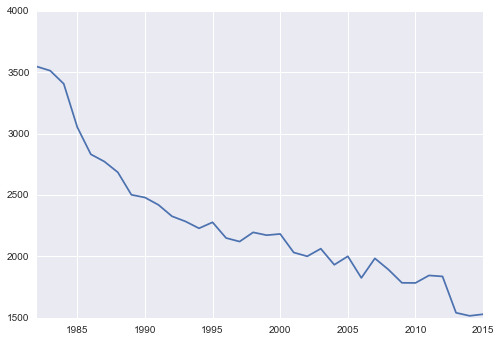

In [89]:
pd.options.display.max_rows = 71

date_format = "%m/%d/%Y %I:%M:%S %p"
date = events['ev_date'].dropna()
date = pd.to_datetime(date, format=date_format)
time = events['ev_time'].astype(str).str.split('.').str[0].str.zfill(4)
time = pd.to_datetime(time, format="%H%M", errors='coerce') # for nan values

time.fillna('0000', inplace=True)

str_date = date.dt.date.astype(str)
str_time = time.dt.time.astype(str)
date_time = pd.to_datetime(str_date + ' ' + str_time,
                           format="%Y-%m-%d %H:%M:%S")
events['ev_date'] = date_time
#events.drop('ev_dow', axis=1, inplace=True)

a = events['ev_date'].dt.year
b = a.value_counts()
b = b.sort_index(ascending=True)
print(b.size)
b = b.iloc[6:40] # the data are reliable from 1982 to 2015 
b.plot()

In [90]:
# here we can see how easy is to add a new column, I should use this somehow

#date_format = '%d/%m/%Y'
#date_2 = pd.to_datetime(occurrences['lchg_date'], format=date_format)
#occurrences['year'] = pd.DatetimeIndex(date_2).year
#occurrences

## First case. Part 121.

In [91]:
aircraft_1 = aircraft.drop_duplicates('ev_id')         # let's start from here.

#far_121 = aircraft_1[ aircraft_1['far_part'] == '121']        # check the performance of this one and the method below
far_121 = aircraft_1.where(aircraft_1['far_part']=='121')              # we make a DataFrame with the FAR type accidents we need
far_121

,ev_id,Aircraft_Key,regis_no,ntsb_no,acft_missing,far_part,flt_plan_filed,flight_plan_activated,damage,acft_fire,...,acft_year,fuel_on_board,commercial_space_flight,unmanned,ifr_equipped_cert,elt_mounted_aircraft,elt_connected_antenna,elt_manufacturer,elt_model,elt_reason_other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20001204X00001,1,N481EV,ANC99IA025,N,121,IFR,NaN,MINR,GRD,...,NaN,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
a = occurrences['ev_id'].isin(far_121['ev_id'])
a_1 = events['ev_id'].isin(far_121['ev_id'])

occurrences.loc[occurrences['Phase_of_Flight'] == 501, 'Phase_of_Flight'] = 500
occurrences.loc[occurrences['Phase_of_Flight'] == 502, 'Phase_of_Flight'] = 500
occurrences.loc[occurrences['Phase_of_Flight'] == 503, 'Phase_of_Flight'] = 500
occurrences.loc[occurrences['Phase_of_Flight'] == 504, 'Phase_of_Flight'] = 500
occurrences.loc[occurrences['Phase_of_Flight'] == 505, 'Phase_of_Flight'] = 500
occurrences.loc[occurrences['Phase_of_Flight'] == 511, 'Phase_of_Flight'] = 510
occurrences.loc[occurrences['Phase_of_Flight'] == 512, 'Phase_of_Flight'] = 510
occurrences.loc[occurrences['Phase_of_Flight'] == 513, 'Phase_of_Flight'] = 510
occurrences.loc[occurrences['Phase_of_Flight'] == 521, 'Phase_of_Flight'] = 520
occurrences.loc[occurrences['Phase_of_Flight'] == 522, 'Phase_of_Flight'] = 520
occurrences.loc[occurrences['Phase_of_Flight'] == 523, 'Phase_of_Flight'] = 520
occurrences.loc[occurrences['Phase_of_Flight'] == 531, 'Phase_of_Flight'] = 530
occurrences.loc[occurrences['Phase_of_Flight'] == 541, 'Phase_of_Flight'] = 540
occurrences.loc[occurrences['Phase_of_Flight'] == 542, 'Phase_of_Flight'] = 580
occurrences.loc[occurrences['Phase_of_Flight'] == 551, 'Phase_of_Flight'] = 550
occurrences.loc[occurrences['Phase_of_Flight'] == 552, 'Phase_of_Flight'] = 550
occurrences.loc[occurrences['Phase_of_Flight'] == 553, 'Phase_of_Flight'] = 550
occurrences.loc[occurrences['Phase_of_Flight'] == 561, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 562, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 563, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 564, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 566, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 567, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 568, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 569, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 571, 'Phase_of_Flight'] = 570
occurrences.loc[occurrences['Phase_of_Flight'] == 572, 'Phase_of_Flight'] = 570
occurrences.loc[occurrences['Phase_of_Flight'] == 574, 'Phase_of_Flight'] = 570
occurrences.loc[occurrences['Phase_of_Flight'] == 575, 'Phase_of_Flight'] = 570
occurrences.loc[occurrences['Phase_of_Flight'] == 576, 'Phase_of_Flight'] = 570
occurrences.loc[occurrences['Phase_of_Flight'] == 583, 'Phase_of_Flight'] = 580

occurrences.loc[occurrences['Occurrence_Code'] == 131, 'Occurrence_Code'] = 130
occurrences.loc[occurrences['Occurrence_Code'] == 171, 'Occurrence_Code'] = 170
occurrences.loc[occurrences['Occurrence_Code'] == 172, 'Occurrence_Code'] = 170
occurrences.loc[occurrences['Occurrence_Code'] == 191, 'Occurrence_Code'] = 190
occurrences.loc[occurrences['Occurrence_Code'] == 192, 'Occurrence_Code'] = 190
occurrences.loc[occurrences['Occurrence_Code'] == 193, 'Occurrence_Code'] = 190
occurrences.loc[occurrences['Occurrence_Code'] == 195, 'Occurrence_Code'] = 190
occurrences.loc[occurrences['Occurrence_Code'] == 232, 'Occurrence_Code'] = 230
occurrences.loc[occurrences['Occurrence_Code'] == 271, 'Occurrence_Code'] = 270
occurrences.loc[occurrences['Occurrence_Code'] == 351, 'Occurrence_Code'] = 350
occurrences.loc[occurrences['Occurrence_Code'] == 352, 'Occurrence_Code'] = 350
occurrences.loc[occurrences['Occurrence_Code'] == 353, 'Occurrence_Code'] = 350
occurrences.loc[occurrences['Occurrence_Code'] == 354, 'Occurrence_Code'] = 350

occurrences_1 = occurrences[a]
events_1 = events[a_1]

occurrences_1['Phase_of_Flight'].value_counts()

570    455
520    359
540    333
510    277
550    224
500    216
560    203
530    192
580     22
600     17
610      7
565      5
590      1
0        1
Name: Phase_of_Flight, dtype: int64

35


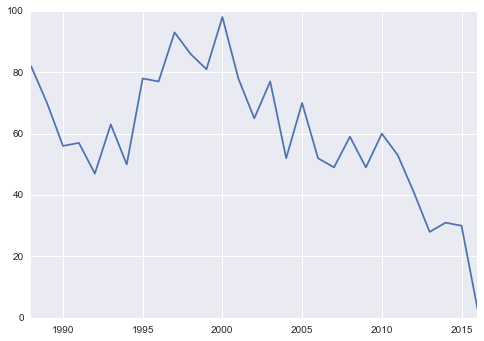

In [99]:
c = events_1['ev_date'].dt.year
c = c.value_counts()
d = c.sort_index(ascending=True)
print(d.size)
d = d.iloc[6:40] # the data are reliable from 1982 to 2015 
d.plot()

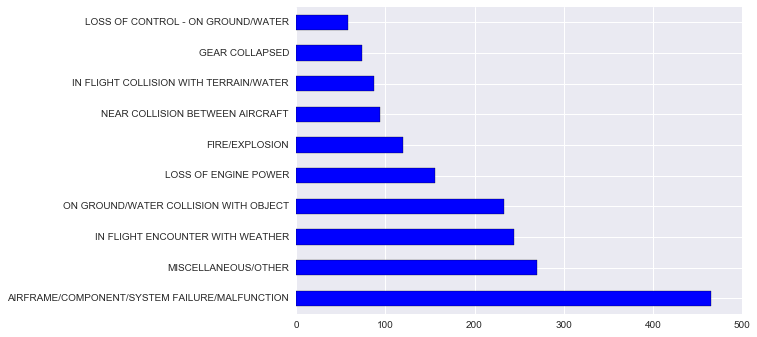

In [100]:
b = occurrences_1['Occurrence_Code'].value_counts()
b = b[0:10]

Occurrences_dict = {130:'AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION',
                    170:'FIRE/EXPLOSION',
                    190:'GEAR COLLAPSED',
                    220:'IN FLIGHT COLLISION WITH OBJECT',
                    230:'IN FLIGHT COLLISION WITH TERRAIN/WATER',
                    240:'IN FLIGHT ENCOUNTER WITH WEATHER',
                    250:'LOSS OF CONTROL - IN FLIGHT',
                    260:'LOSS OF CONTROL - ON GROUND/WATER',
                    280:'NEAR COLLISION BETWEEN AIRCRAFT',
                    310:'ON GROUND/WATER COLLISION WITH OBJECT',
                    320:'ON GROUND/WATER ENCOUNTER WITH TERRAIN/WATER',
                    350:'LOSS OF ENGINE POWER',
                    430:'MISCELLANEOUS/OTHER'}

b = b.rename_axis(Occurrences_dict)
b.plot.barh(stacked=True)

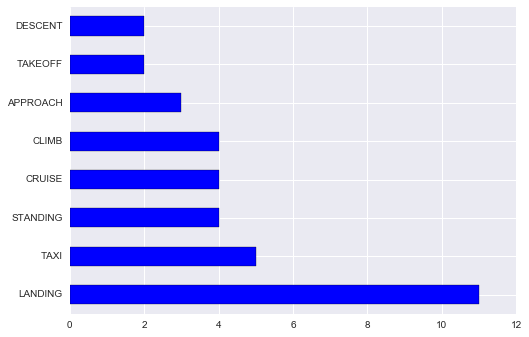

In [158]:
occurrences_1 = occurrences_1.drop_duplicates('Occurrence_Code') # see drop_duplicates.ipynb

a = occurrences_1['Phase_of_Flight'].value_counts()
b = a[0:10]  #  Why are we discarding the rest of maneuvers?

maneuvers = {500:'STANDING',
             510:'TAKEOFF',
             520:'TAXI',
             530:'CLIMB',
             540:'CRUISE',
             550:'DESCENT',
             560:'APPROACH',
             570:'LANDING',
             580:'MANEUVERING',
             590:'HOVER',
             600:'OTHER',}
            

b = b.rename_axis(maneuvers)

b.plot.barh(stacked=True)

### Second case. Part 121. Years 2007, 2008, 2009

In [141]:
occurrences = pd.read_csv("./data/Occurrences1.csv",
                                    sep=';')

In [142]:
aircraft_2 = aircraft
events_2 = events

aircraft_2 = aircraft_2.where(aircraft_2['far_part'] == '121')      # we make a DataFrame with the FAR type accidents we need
events_2 = events_2.mask(events_2['ev_year'] < 2007.0)
events_2 = events_2.mask(events_2['ev_year'] > 2009.0)
pd.options.display.max_rows = 500


In [155]:
occurrences.loc[occurrences['Phase_of_Flight'] == 501, 'Phase_of_Flight'] = 500
occurrences.loc[occurrences['Phase_of_Flight'] == 502, 'Phase_of_Flight'] = 500
occurrences.loc[occurrences['Phase_of_Flight'] == 503, 'Phase_of_Flight'] = 500
occurrences.loc[occurrences['Phase_of_Flight'] == 504, 'Phase_of_Flight'] = 500
occurrences.loc[occurrences['Phase_of_Flight'] == 505, 'Phase_of_Flight'] = 500
occurrences.loc[occurrences['Phase_of_Flight'] == 511, 'Phase_of_Flight'] = 510
occurrences.loc[occurrences['Phase_of_Flight'] == 512, 'Phase_of_Flight'] = 510
occurrences.loc[occurrences['Phase_of_Flight'] == 513, 'Phase_of_Flight'] = 510
occurrences.loc[occurrences['Phase_of_Flight'] == 521, 'Phase_of_Flight'] = 520
occurrences.loc[occurrences['Phase_of_Flight'] == 522, 'Phase_of_Flight'] = 520
occurrences.loc[occurrences['Phase_of_Flight'] == 523, 'Phase_of_Flight'] = 520
occurrences.loc[occurrences['Phase_of_Flight'] == 531, 'Phase_of_Flight'] = 530
occurrences.loc[occurrences['Phase_of_Flight'] == 541, 'Phase_of_Flight'] = 540
occurrences.loc[occurrences['Phase_of_Flight'] == 542, 'Phase_of_Flight'] = 580
occurrences.loc[occurrences['Phase_of_Flight'] == 551, 'Phase_of_Flight'] = 550
occurrences.loc[occurrences['Phase_of_Flight'] == 552, 'Phase_of_Flight'] = 550
occurrences.loc[occurrences['Phase_of_Flight'] == 553, 'Phase_of_Flight'] = 550
occurrences.loc[occurrences['Phase_of_Flight'] == 561, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 562, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 563, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 564, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 566, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 567, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 568, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 569, 'Phase_of_Flight'] = 560
occurrences.loc[occurrences['Phase_of_Flight'] == 571, 'Phase_of_Flight'] = 570
occurrences.loc[occurrences['Phase_of_Flight'] == 572, 'Phase_of_Flight'] = 570
occurrences.loc[occurrences['Phase_of_Flight'] == 574, 'Phase_of_Flight'] = 570
occurrences.loc[occurrences['Phase_of_Flight'] == 575, 'Phase_of_Flight'] = 570
occurrences.loc[occurrences['Phase_of_Flight'] == 576, 'Phase_of_Flight'] = 570
occurrences.loc[occurrences['Phase_of_Flight'] == 583, 'Phase_of_Flight'] = 580

occurrences.loc[occurrences['Occurrence_Code'] == 131, 'Occurrence_Code'] = 130
occurrences.loc[occurrences['Occurrence_Code'] == 171, 'Occurrence_Code'] = 170
occurrences.loc[occurrences['Occurrence_Code'] == 172, 'Occurrence_Code'] = 170
occurrences.loc[occurrences['Occurrence_Code'] == 191, 'Occurrence_Code'] = 190
occurrences.loc[occurrences['Occurrence_Code'] == 192, 'Occurrence_Code'] = 190
occurrences.loc[occurrences['Occurrence_Code'] == 193, 'Occurrence_Code'] = 190
occurrences.loc[occurrences['Occurrence_Code'] == 195, 'Occurrence_Code'] = 190
occurrences.loc[occurrences['Occurrence_Code'] == 232, 'Occurrence_Code'] = 230
occurrences.loc[occurrences['Occurrence_Code'] == 271, 'Occurrence_Code'] = 270
occurrences.loc[occurrences['Occurrence_Code'] == 351, 'Occurrence_Code'] = 350
occurrences.loc[occurrences['Occurrence_Code'] == 352, 'Occurrence_Code'] = 350
occurrences.loc[occurrences['Occurrence_Code'] == 353, 'Occurrence_Code'] = 350
occurrences.loc[occurrences['Occurrence_Code'] == 354, 'Occurrence_Code'] = 350

occurrences_2 = occurrences

cond_2 = occurrences_2['ev_id'].isin(aircraft_2['ev_id'])   # part 121
cond_2_1 = events_2['ev_id'].isin(aircraft_2['ev_id'])      # part 121

cond_2_a = occurrences_2['ev_id'].isin(events_2['ev_id'])   # years 2007,2008 and 2009
cond_2_a_1 = events_2['ev_id'].isin(events_2['ev_id'])      # years 2007,2008 and 2009

occurrences_2 = occurrences_2[cond_2 & cond_2_a]            # check this boolean expression, is this what we are looking for?
events_2 = events_2[cond_2_1 & cond_2_a_1]
occurrences_2


,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Phase_of_Flight,Altitude,lchg_date,lchg_userid
133980,20070131X00119,1,1,130,530,0,15/01/2008,BOWL
133981,20070131X00119,1,2,350,530,0,15/01/2008,BOWL
134030,20070206X00142,1,1,430,570,0,18/07/2007,ntsb\labj
134157,20070223X00215,1,1,340,570,0,07/08/2008,SCHD
134158,20070223X00215,1,2,310,570,0,07/08/2008,SCHD
134198,20070228X00237,1,1,260,570,0,13/12/2007,CASH
134199,20070228X00237,1,2,230,570,0,13/12/2007,CASH
134252,20070309X00265,1,1,240,540,34000,11/02/2008,ntsb\labj
134281,20070313X00281,1,1,330,520,0,23/05/2007,BOWL
134282,20070313X00281,1,2,180,600,0,23/05/2007,BOWL


3


2008    59
2009    49
2007    49
Name: ev_date, dtype: int64

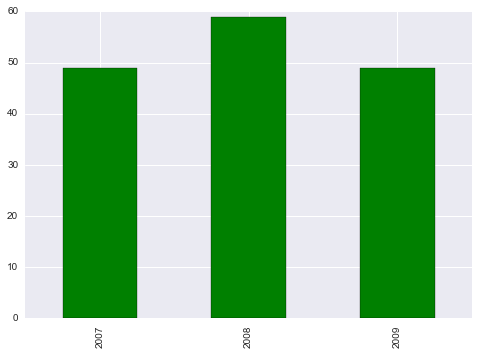

In [157]:
c_2 = events_2['ev_date'].dt.year
c_2 = c_2.value_counts()
d_2 = c_2.sort_index(ascending=True)
print(d_2.size)
d_2.plot(kind='bar',color='g')


MIDAIR COLLISION                                 1
140                                              1
AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION    1
LOSS OF CONTROL - ON GROUND/WATER                1
GEAR COLLAPSED                                   1
IN FLIGHT COLLISION WITH TERRAIN/WATER           1
200                                              1
ON GROUND/WATER ENCOUNTER WITH WEATHER           1
180                                              1
MISCELLANEOUS/OTHER                              1
LOSS OF ENGINE POWER                             1
FIRE/EXPLOSION                                   1
IN FLIGHT ENCOUNTER WITH WEATHER                 1
OVERRUN                                          1
160                                              1
ON GROUND/WATER COLLISION WITH OBJECT            1
110                                              1
IN FLIGHT COLLISION WITH OBJECT                  1
ON GROUND/WATER ENCOUNTER WITH TERRAIN/WATER     1
Name: Occurrence_Code, dtype: i

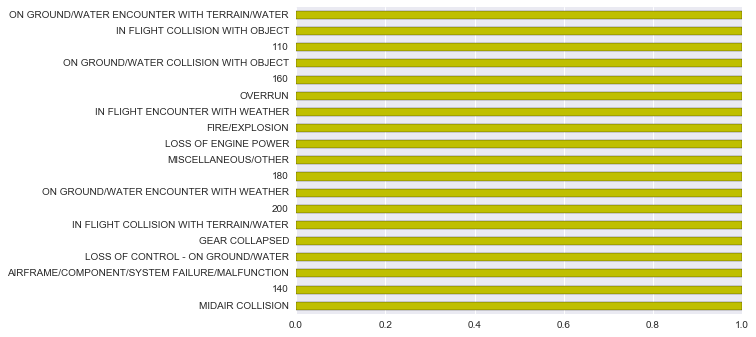

In [152]:
b = occurrences_2['Occurrence_Code'].value_counts()


Occurrences_dict = {130:'AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION',
                    170:'FIRE/EXPLOSION',
                    190:'GEAR COLLAPSED',
                    220:'IN FLIGHT COLLISION WITH OBJECT',
                    230:'IN FLIGHT COLLISION WITH TERRAIN/WATER',
                    240:'IN FLIGHT ENCOUNTER WITH WEATHER',
                    250:'LOSS OF CONTROL - IN FLIGHT',
                    260:'LOSS OF CONTROL - ON GROUND/WATER',
                    270:'MIDAIR COLLISION',
                    280:'NEAR COLLISION BETWEEN AIRCRAFT',
                    310:'ON GROUND/WATER COLLISION WITH OBJECT',
                    320:'ON GROUND/WATER ENCOUNTER WITH TERRAIN/WATER',
                    330:'ON GROUND/WATER ENCOUNTER WITH WEATHER',
                    340:'OVERRUN',
                    350:'LOSS OF ENGINE POWER',
                    430:'MISCELLANEOUS/OTHER'}

b = b.rename_axis(Occurrences_dict)
b.plot.barh(stacked=True,color='y')
b

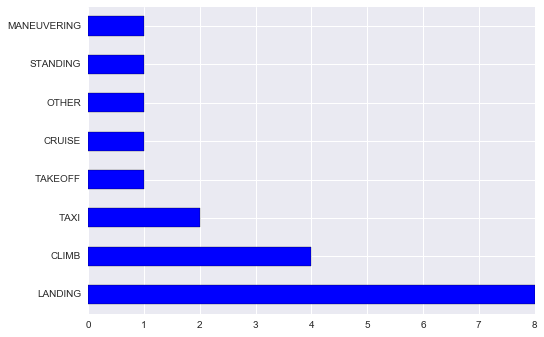

In [153]:
occurrences_2 = occurrences_2.drop_duplicates('Occurrence_Code')

a = occurrences_2['Phase_of_Flight'].value_counts()

maneuvers = {500:'STANDING',
             510:'TAKEOFF',
             520:'TAXI',
             530:'CLIMB',
             540:'CRUISE',
             550:'DESCENT',
             560:'APPROACH',
             570:'LANDING',
             580:'MANEUVERING',
             590:'HOVER',
             600:'OTHER',}
            

a = a.rename_axis(maneuvers)

a.plot.barh(stacked=True)

#### Other Questions... 

### Conclusions 

# Thanks for yor attention! 

![PyData_logo](./static/pydata-logo-madrid-2016.png)

## Any Questions?


---


In [1]:
# Notebook style
from IPython.core.display import HTML
css_file = './static/style.css'
HTML(open(css_file, "r").read())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 2 columns):
x    40 non-null int32
y    40 non-null float64
dtypes: float64(1), int32(1)
memory usage: 800.0 bytes


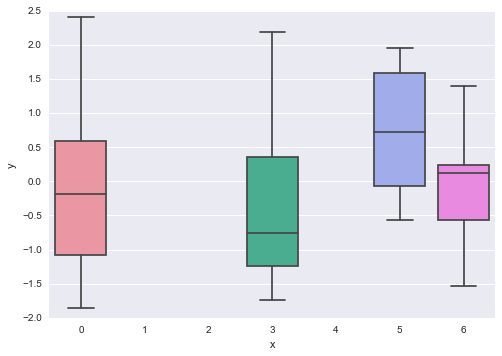

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.DataFrame(dict(x=np.repeat([0, 3, 5, 6], 10),
                       y=np.random.randn(40)))
sns.boxplot(x="x", y="y", data=df, order=np.arange(7))
df.info()